# Objective:

The objective of the "HR Analytics - Employee Promotion Prediction" project is to assist HR teams in identifying employees who
are likely to be promoted based on various attributes. This helps organizations streamline the promotion process, recognize
deserving employees, and ensure fairness and efficiency in talent management.

# Understanding Business Problems for " Employee Promotion Prediction "
The "HR Analytics - Employee Promotion Prediction" problem helps companies identify which employees are likely to be promoted based on data
like performance, training, and experience. This ensures fair promotions, keeps employees happy, and improves productivity.

# Problem Statement:
The goal is to predict employee promotions using historical data like performance ratings, training hours, and experience, with "Promoted" as 
the target column. Using EDA, a module is created to ensure fair and data-driven promotion decisions.

In [3]:
# lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# train test split
from sklearn.model_selection import train_test_split

In [4]:
# importing dataset
data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\Python\EDA_Hr_Analytics_Employee_Promotion.csv")
data

,Employee_ID,Department,Education,Gender,Age,Experience_Years,Previous_Ratings,Training_Hours,Awards,Average_Work_Hours,Promoted
0,E0001,Finance,Bachelor,Female,55,3,2.26,21,4,37,No
1,E0002,Operations,Bachelor,Female,30,8,1.90,97,1,44,No
2,E0003,HR,Bachelor,Male,45,23,1.28,78,2,51,No
3,E0004,Operations,Bachelor,Female,29,11,4.31,93,0,41,No
4,E0005,Operations,Bachelor,Male,28,8,2.02,48,1,49,No
...,...,...,...,...,...,...,...,...,...,...,...
995,E0996,Marketing,Bachelor,Female,31,23,4.46,79,2,47,Yes
996,E0997,Operations,Master,Male,53,15,2.78,97,3,50,No
997,E0998,Sales,Bachelor,Female,36,33,1.55,15,1,43,No
998,E0999,Sales,PhD,Male,58,21,4.45,36,0,36,No


In [5]:
#EDA for each data analysis
def eda(data):
    print("Shape:",data.shape)
    print("- "*50)
    print("Size:",data.size)
    print("- "*50)
    print("INFO:",data.info)
    print("- "*50)
    print("Describe:",data.describe())
    print("- "*50)
    print("Dtype:",data.dtypes)
    print("- "*50)
    print("Checking Null Values:",data.isnull().sum())

eda(data)

Shape: (1000, 11)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Size: 11000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INFO: <bound method DataFrame.info of     Employee_ID  Department Education  Gender  Age  Experience_Years  \
0         E0001     Finance  Bachelor  Female   55                 3   
1         E0002  Operations  Bachelor  Female   30                 8   
2         E0003          HR  Bachelor    Male   45                23   
3         E0004  Operations  Bachelor  Female   29                11   
4         E0005  Operations  Bachelor    Male   28                 8   
..          ...         ...       ...     ...  ...               ...   
995       E0996   Marketing  Bachelor  Female   31                23   
996       E0997  Operations    Master    Male   53                15   
997       E0998       Sales  Bachelor  Female   36                33   
998       

In [6]:
# Analysis for Numerical Columns
def Num_col(data, col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    var =data[col].var()
    std=data[col].std()
    skew=data[col].skew()
    Min=data[col].min()
    Max=data[col].max()
    Range=Max-Min
    print("Numerical Columns Analysis:")
    print(f"mean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}\nMIN:{Min}\nMAAX:{Max}\nRange:{Range}")


In [7]:
Num_col(data,"Age")

Numerical Columns Analysis:
mean:40.515
median:41.0
mode:50
var:118.76654154154176
std:10.89800631040108
skew:-0.022107532391192068
MIN:22
MAAX:59
Range:37


<Axes: xlabel='Age', ylabel='Count'>

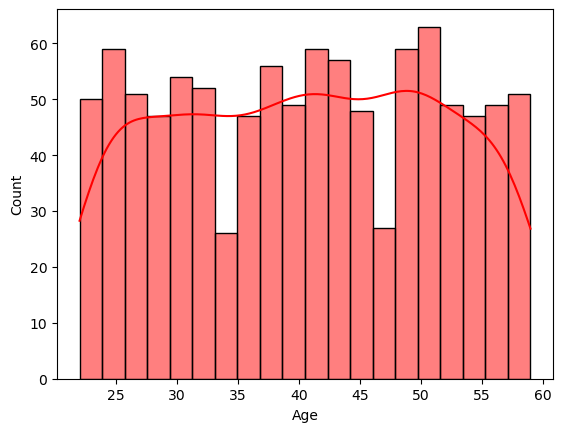

In [87]:
sns.histplot(data=data,x="Age",bins=20,kde=True,color="red")

In [9]:
Num_col(data,"Experience_Years")

Numerical Columns Analysis:
mean:17.686
median:18.0
mode:23
var:90.42983383383378
std:9.509460228311267
skew:-0.04056089551054327
MIN:1
MAAX:34
Range:33


<Axes: xlabel='Experience_Years', ylabel='Count'>

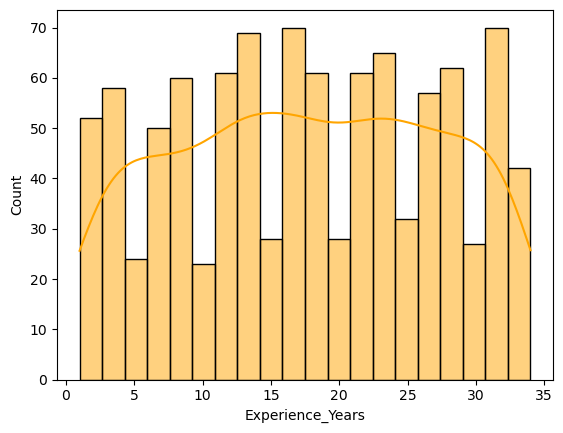

In [94]:
sns.histplot(data=data,x="Experience_Years",bins=20,kde=True,color="orange")

In [10]:
Num_col(data,"Previous_Ratings")

Numerical Columns Analysis:
mean:2.95106
median:2.93
mode:4.45
var:1.3179025789789776
std:1.147999381088238
skew:0.021283061052464452
MIN:1.0
MAAX:4.99
Range:3.99


<Axes: xlabel='Previous_Ratings', ylabel='Count'>

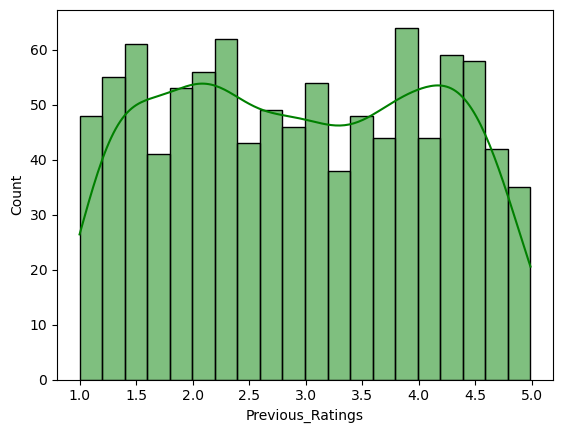

In [96]:
sns.histplot(data=data,x="Previous_Ratings",bins=20,kde=True,color="green")

In [11]:
Num_col(data,"Training_Hours")

Numerical Columns Analysis:
mean:54.253
median:54.0
mode:67
var:679.4244154154142
std:26.065770953789457
skew:0.021975281445215742
MIN:10
MAAX:99
Range:89


<Axes: xlabel='Training_Hours', ylabel='Count'>

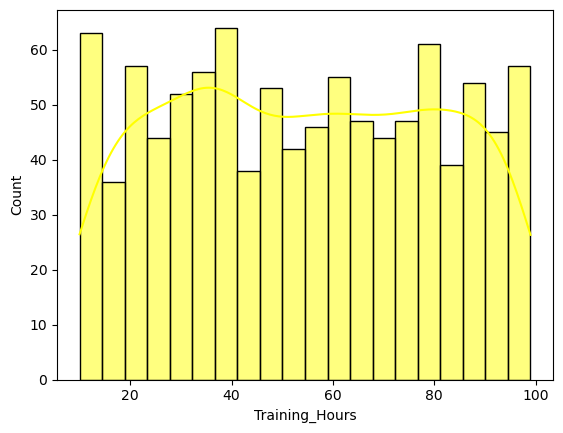

In [98]:
sns.histplot(data=data,x="Training_Hours",bins=20,kde=True,color="yellow")

In [12]:
Num_col(data,"Awards")

Numerical Columns Analysis:
mean:1.933
median:2.0
mode:0
var:2.0225335335334984
std:1.422158055046449
skew:0.06186876582583571
MIN:0
MAAX:4
Range:4


<Axes: xlabel='Awards', ylabel='Count'>

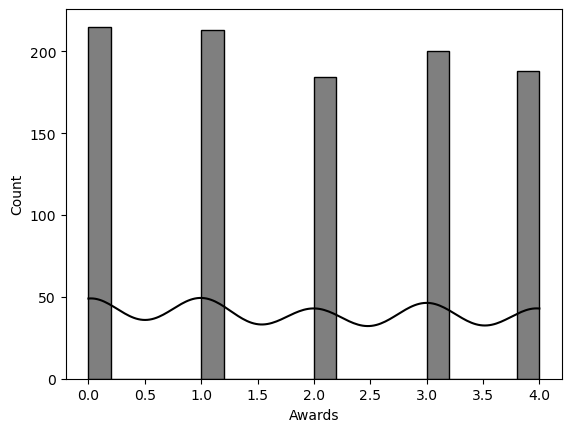

In [100]:
sns.histplot(data=data,x="Awards",bins=20,kde=True,color="black")

In [13]:
Num_col(data,"Average_Work_Hours")

Numerical Columns Analysis:
mean:47.213
median:47.0
mode:35
var:53.941572572572625
std:7.344492669515889
skew:-0.06725017139648948
MIN:35
MAAX:59
Range:24


<Axes: xlabel='Average_Work_Hours', ylabel='Count'>

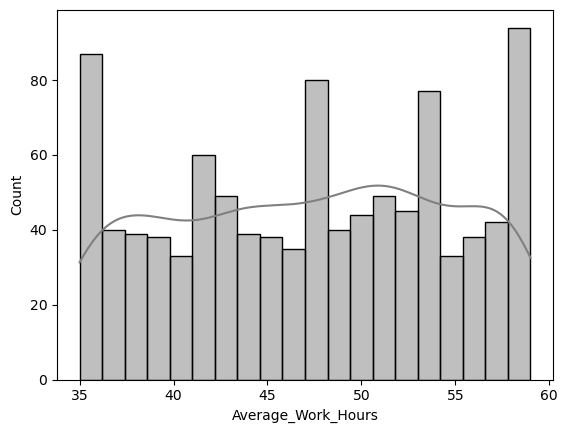

In [102]:
sns.histplot(data=data,x="Average_Work_Hours",bins=20,kde=True,color="gray")

In [14]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(data, col):
    sns.boxplot(data[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = data[(data[col] < LowerTail) | (data[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    data.loc[data[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(data.head())

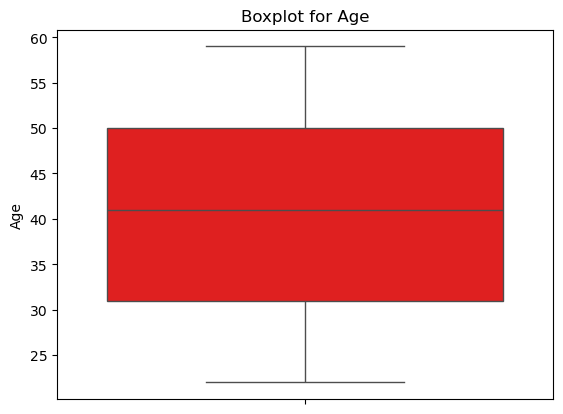

25% Quantile q1 = 31.0
75% Quantile q3 = 50.0
IQR = 19.0

--------------------------------------------------------------------------------
Lower Tail = 2.5
Upper Tail = 78.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Employee_ID, Department, Education, Gender, Age, Experience_Years, Previous_Ratings, Training_Hours, Awards, Average_Work_Hours, Promoted]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

  Employee_ID  Department Education  Gender   Age  Experience_Years  \
0       E0001     Finance  Bachelor  Female  55.0                 3   
1       E0002  Operations  Bachelor  Female  30.0                 8   
2       E0003          HR  Bachelor    Male  45.0                23   
3       E0004  Operations  Bachelor  Female  29.0                11   
4       E0005  Operations  Bachelor    Male  28.0                 8   

   Previous_Rat

C:\Users\deshm\AppData\Local\Temp\ipykernel_33896\2491079757.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [15]:
Checking_and_Handling_Of_Outliers(data, "Age")

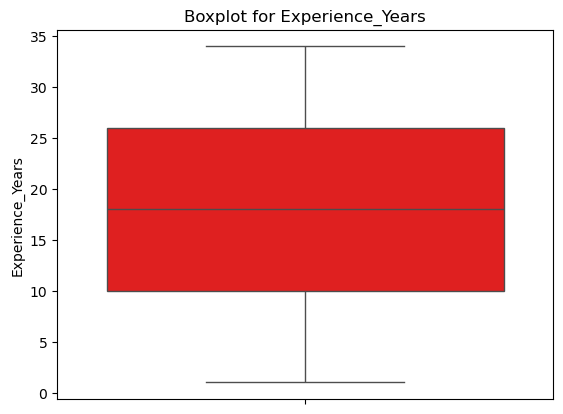

25% Quantile q1 = 10.0
75% Quantile q3 = 26.0
IQR = 16.0

--------------------------------------------------------------------------------
Lower Tail = -14.0
Upper Tail = 50.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Employee_ID, Department, Education, Gender, Age, Experience_Years, Previous_Ratings, Training_Hours, Awards, Average_Work_Hours, Promoted]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

  Employee_ID  Department Education  Gender   Age  Experience_Years  \
0       E0001     Finance  Bachelor  Female  55.0                 3   
1       E0002  Operations  Bachelor  Female  30.0                 8   
2       E0003          HR  Bachelor    Male  45.0                23   
3       E0004  Operations  Bachelor  Female  29.0                11   
4       E0005  Operations  Bachelor    Male  28.0                 8   

   Previous_R

In [16]:
Checking_and_Handling_Of_Outliers(data, "Experience_Years")

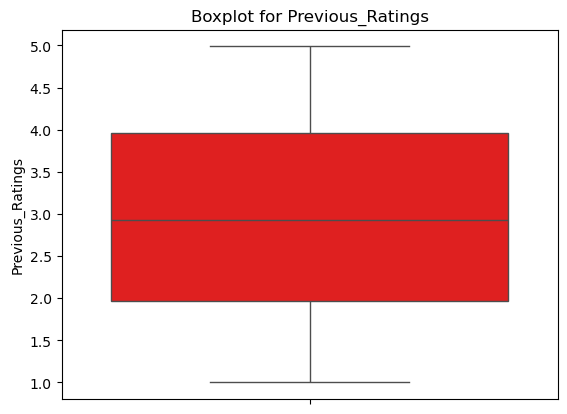

25% Quantile q1 = 1.9675
75% Quantile q3 = 3.96
IQR = 1.9925

--------------------------------------------------------------------------------
Lower Tail = -1.02125
Upper Tail = 6.94875
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Employee_ID, Department, Education, Gender, Age, Experience_Years, Previous_Ratings, Training_Hours, Awards, Average_Work_Hours, Promoted]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

  Employee_ID  Department Education  Gender   Age  Experience_Years  \
0       E0001     Finance  Bachelor  Female  55.0                 3   
1       E0002  Operations  Bachelor  Female  30.0                 8   
2       E0003          HR  Bachelor    Male  45.0                23   
3       E0004  Operations  Bachelor  Female  29.0                11   
4       E0005  Operations  Bachelor    Male  28.0                 8   

   

In [17]:
Checking_and_Handling_Of_Outliers(data, "Previous_Ratings")

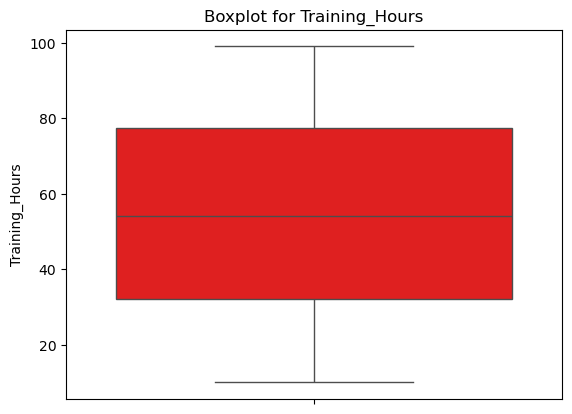

25% Quantile q1 = 32.0
75% Quantile q3 = 77.25
IQR = 45.25

--------------------------------------------------------------------------------
Lower Tail = -35.875
Upper Tail = 145.125
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Employee_ID, Department, Education, Gender, Age, Experience_Years, Previous_Ratings, Training_Hours, Awards, Average_Work_Hours, Promoted]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

  Employee_ID  Department Education  Gender   Age  Experience_Years  \
0       E0001     Finance  Bachelor  Female  55.0                 3   
1       E0002  Operations  Bachelor  Female  30.0                 8   
2       E0003          HR  Bachelor    Male  45.0                23   
3       E0004  Operations  Bachelor  Female  29.0                11   
4       E0005  Operations  Bachelor    Male  28.0                 8   

   Pre

C:\Users\deshm\AppData\Local\Temp\ipykernel_33896\2491079757.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-35.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [18]:
Checking_and_Handling_Of_Outliers(data, "Training_Hours")

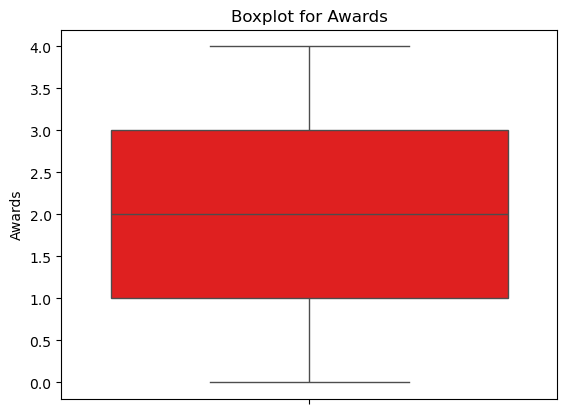

25% Quantile q1 = 1.0
75% Quantile q3 = 3.0
IQR = 2.0

--------------------------------------------------------------------------------
Lower Tail = -2.0
Upper Tail = 6.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Employee_ID, Department, Education, Gender, Age, Experience_Years, Previous_Ratings, Training_Hours, Awards, Average_Work_Hours, Promoted]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

  Employee_ID  Department Education  Gender   Age  Experience_Years  \
0       E0001     Finance  Bachelor  Female  55.0                 3   
1       E0002  Operations  Bachelor  Female  30.0                 8   
2       E0003          HR  Bachelor    Male  45.0                23   
3       E0004  Operations  Bachelor  Female  29.0                11   
4       E0005  Operations  Bachelor    Male  28.0                 8   

   Previous_Rating

In [19]:
Checking_and_Handling_Of_Outliers(data, "Awards")

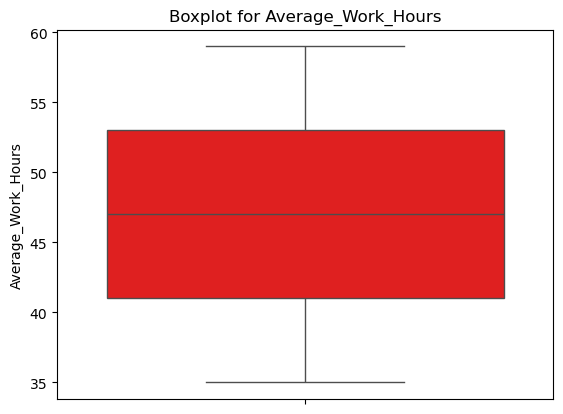

25% Quantile q1 = 41.0
75% Quantile q3 = 53.0
IQR = 12.0

--------------------------------------------------------------------------------
Lower Tail = 23.0
Upper Tail = 71.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Employee_ID, Department, Education, Gender, Age, Experience_Years, Previous_Ratings, Training_Hours, Awards, Average_Work_Hours, Promoted]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

  Employee_ID  Department Education  Gender   Age  Experience_Years  \
0       E0001     Finance  Bachelor  Female  55.0                 3   
1       E0002  Operations  Bachelor  Female  30.0                 8   
2       E0003          HR  Bachelor    Male  45.0                23   
3       E0004  Operations  Bachelor  Female  29.0                11   
4       E0005  Operations  Bachelor    Male  28.0                 8   

   Previous_Ra

In [20]:
Checking_and_Handling_Of_Outliers(data, "Average_Work_Hours")

In [21]:
data.isna().sum()

Employee_ID           0
Department            0
Education             0
Gender                0
Age                   0
Experience_Years      0
Previous_Ratings      0
Training_Hours        0
Awards                0
Average_Work_Hours    0
Promoted              0
dtype: int64

In [22]:
data.dtypes

Employee_ID            object
Department             object
Education              object
Gender                 object
Age                   float64
Experience_Years        int64
Previous_Ratings      float64
Training_Hours        float64
Awards                  int64
Average_Work_Hours      int64
Promoted               object
dtype: object

In [23]:
# Analysis of categorical Columns
def Cat_col(data, col):
    unique_values = data[col].unique()  # Fixed typo: renamed to unique_values
    value_counts = data[col].value_counts()
    mode = data[col].mode()[0]  # Fixed mode access by adding parentheses

    # Enhanced string formatting for clarity
    print(f"Unique Values in '{col}':\n{unique_values}\n")
    print(f"Value Counts in '{col}':\n{value_counts}\n")
    print(f"Mode of '{col}': {mode}\n")


    data[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"data-{col} (pie chart)")
    plt.show
    

In [24]:
data.dtypes

Employee_ID            object
Department             object
Education              object
Gender                 object
Age                   float64
Experience_Years        int64
Previous_Ratings      float64
Training_Hours        float64
Awards                  int64
Average_Work_Hours      int64
Promoted               object
dtype: object

In [25]:
data.drop(columns=["Employee_ID"],inplace=True)

Unique Values in 'Department':
['Finance' 'Operations' 'HR' 'IT' 'Marketing' 'Sales']

Value Counts in 'Department':
Department
Sales         181
Finance       174
Operations    172
IT            164
Marketing     155
HR            154
Name: count, dtype: int64

Mode of 'Department': Sales



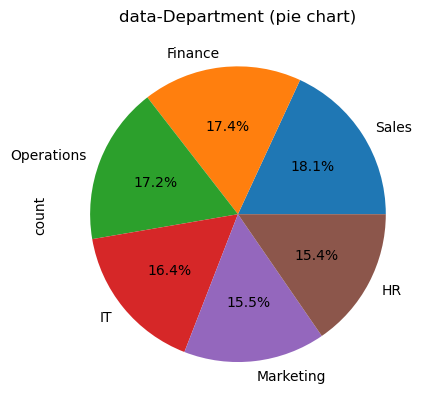

In [26]:
Cat_col(data, "Department")

Unique Values in 'Education':
['Bachelor' 'Master' 'PhD']

Value Counts in 'Education':
Education
Bachelor    593
Master      309
PhD          98
Name: count, dtype: int64

Mode of 'Education': Bachelor



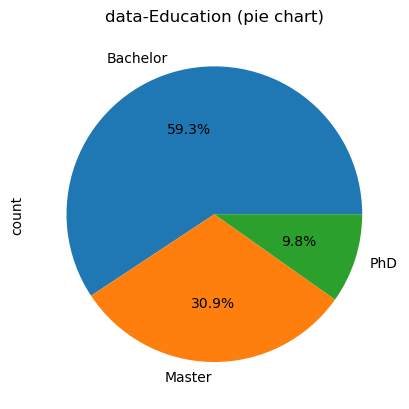

In [27]:
Cat_col(data, "Education")

Unique Values in 'Gender':
['Female' 'Male']

Value Counts in 'Gender':
Gender
Male      589
Female    411
Name: count, dtype: int64

Mode of 'Gender': Male



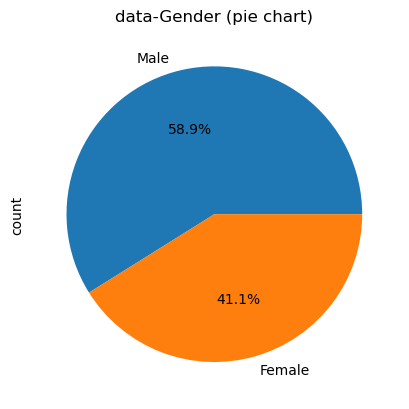

In [28]:
Cat_col(data, "Gender")

Unique Values in 'Promoted':
['No' 'Yes']

Value Counts in 'Promoted':
Promoted
No     901
Yes     99
Name: count, dtype: int64

Mode of 'Promoted': No



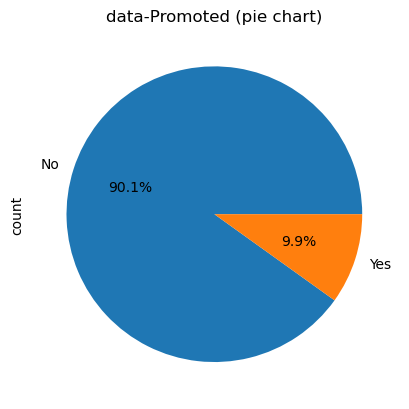

In [29]:
Cat_col(data, "Promoted")

In [30]:
# Bivariate analysis Column Analysis
def bivariate_violin_plot(data, categorical_col, numerical_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")
    plt.title(f'Violin Plot: {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(numerical_col, fontsize=12)
    plt.show()


C:\Users\deshm\AppData\Local\Temp\ipykernel_33896\868759973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")


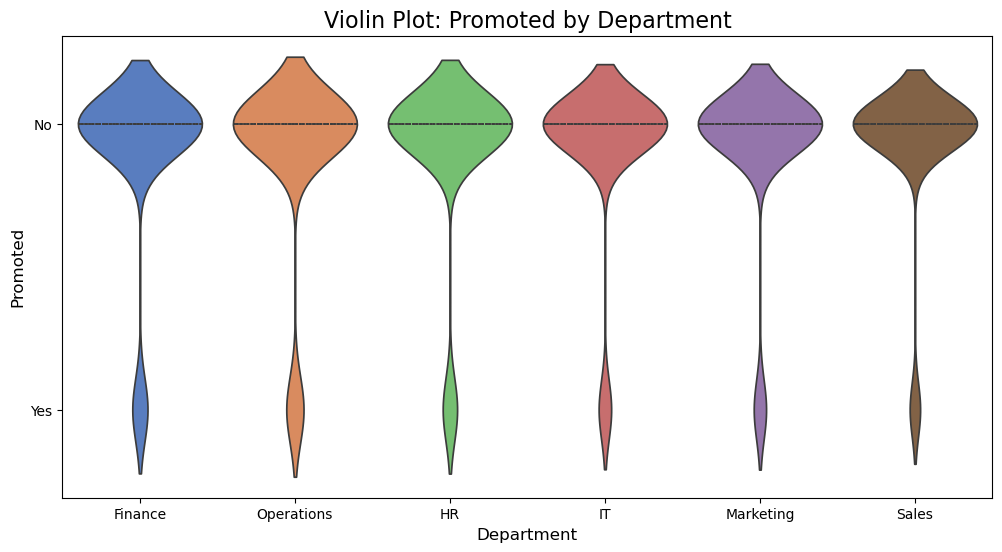

In [31]:
bivariate_violin_plot(data, "Department", "Promoted")

In [32]:
data.dtypes

Department             object
Education              object
Gender                 object
Age                   float64
Experience_Years        int64
Previous_Ratings      float64
Training_Hours        float64
Awards                  int64
Average_Work_Hours      int64
Promoted               object
dtype: object

In [33]:
#Encoding of categorical columns
#Bathroom 
data["Education"].unique()

array(['Bachelor', 'Master', 'PhD'], dtype=object)

In [34]:
data["Education_encoded"]=data["Education"].replace({'Bachelor':0, 'Master':1, 'PhD':3})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33896\4236576312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Education_encoded"]=data["Education"].replace({'Bachelor':0, 'Master':1, 'PhD':3})


In [35]:
#Gender
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [36]:
data["Gender_encoding"]=data["Gender"].replace({'Female':0, 'Male':1})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33896\242963522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender_encoding"]=data["Gender"].replace({'Female':0, 'Male':1})


In [37]:
#Department
data["Department"].unique()

array(['Finance', 'Operations', 'HR', 'IT', 'Marketing', 'Sales'],
      dtype=object)

In [38]:
data["Departmen_encoded"]=data["Department"].replace({'Finance':0, 'Operations':1, 'HR':2, 'IT':3, 'Marketing':4, 'Sales':5})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33896\873350904.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Departmen_encoded"]=data["Department"].replace({'Finance':0, 'Operations':1, 'HR':2, 'IT':3, 'Marketing':4, 'Sales':5})


In [39]:
data.drop(columns=["Education"],inplace=True)
data.drop(columns=["Gender"],inplace=True)
data.drop(columns=["Department"],inplace=True)

In [40]:
data

,Age,Experience_Years,Previous_Ratings,Training_Hours,Awards,Average_Work_Hours,Promoted,Education_encoded,Gender_encoding,Departmen_encoded
0,55.0,3,2.26,21.0,4,37,No,0,0,0
1,30.0,8,1.90,97.0,1,44,No,0,0,1
2,45.0,23,1.28,78.0,2,51,No,0,1,2
3,29.0,11,4.31,93.0,0,41,No,0,0,1
4,28.0,8,2.02,48.0,1,49,No,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,31.0,23,4.46,79.0,2,47,Yes,0,0,4
996,53.0,15,2.78,97.0,3,50,No,1,1,1
997,36.0,33,1.55,15.0,1,43,No,0,0,5
998,58.0,21,4.45,36.0,0,36,No,3,1,5


In [41]:
# Dependent Column (target)
data=data.loc[:,data.columns.difference(["Promoted"]).tolist() + ["Promoted"]]

In [42]:
data

,Age,Average_Work_Hours,Awards,Departmen_encoded,Education_encoded,Experience_Years,Gender_encoding,Previous_Ratings,Training_Hours,Promoted
0,55.0,37,4,0,0,3,0,2.26,21.0,No
1,30.0,44,1,1,0,8,0,1.90,97.0,No
2,45.0,51,2,2,0,23,1,1.28,78.0,No
3,29.0,41,0,1,0,11,0,4.31,93.0,No
4,28.0,49,1,1,0,8,1,2.02,48.0,No
...,...,...,...,...,...,...,...,...,...,...
995,31.0,47,2,4,0,23,0,4.46,79.0,Yes
996,53.0,50,3,1,1,15,1,2.78,97.0,No
997,36.0,43,1,5,0,33,0,1.55,15.0,No
998,58.0,36,0,5,3,21,1,4.45,36.0,No


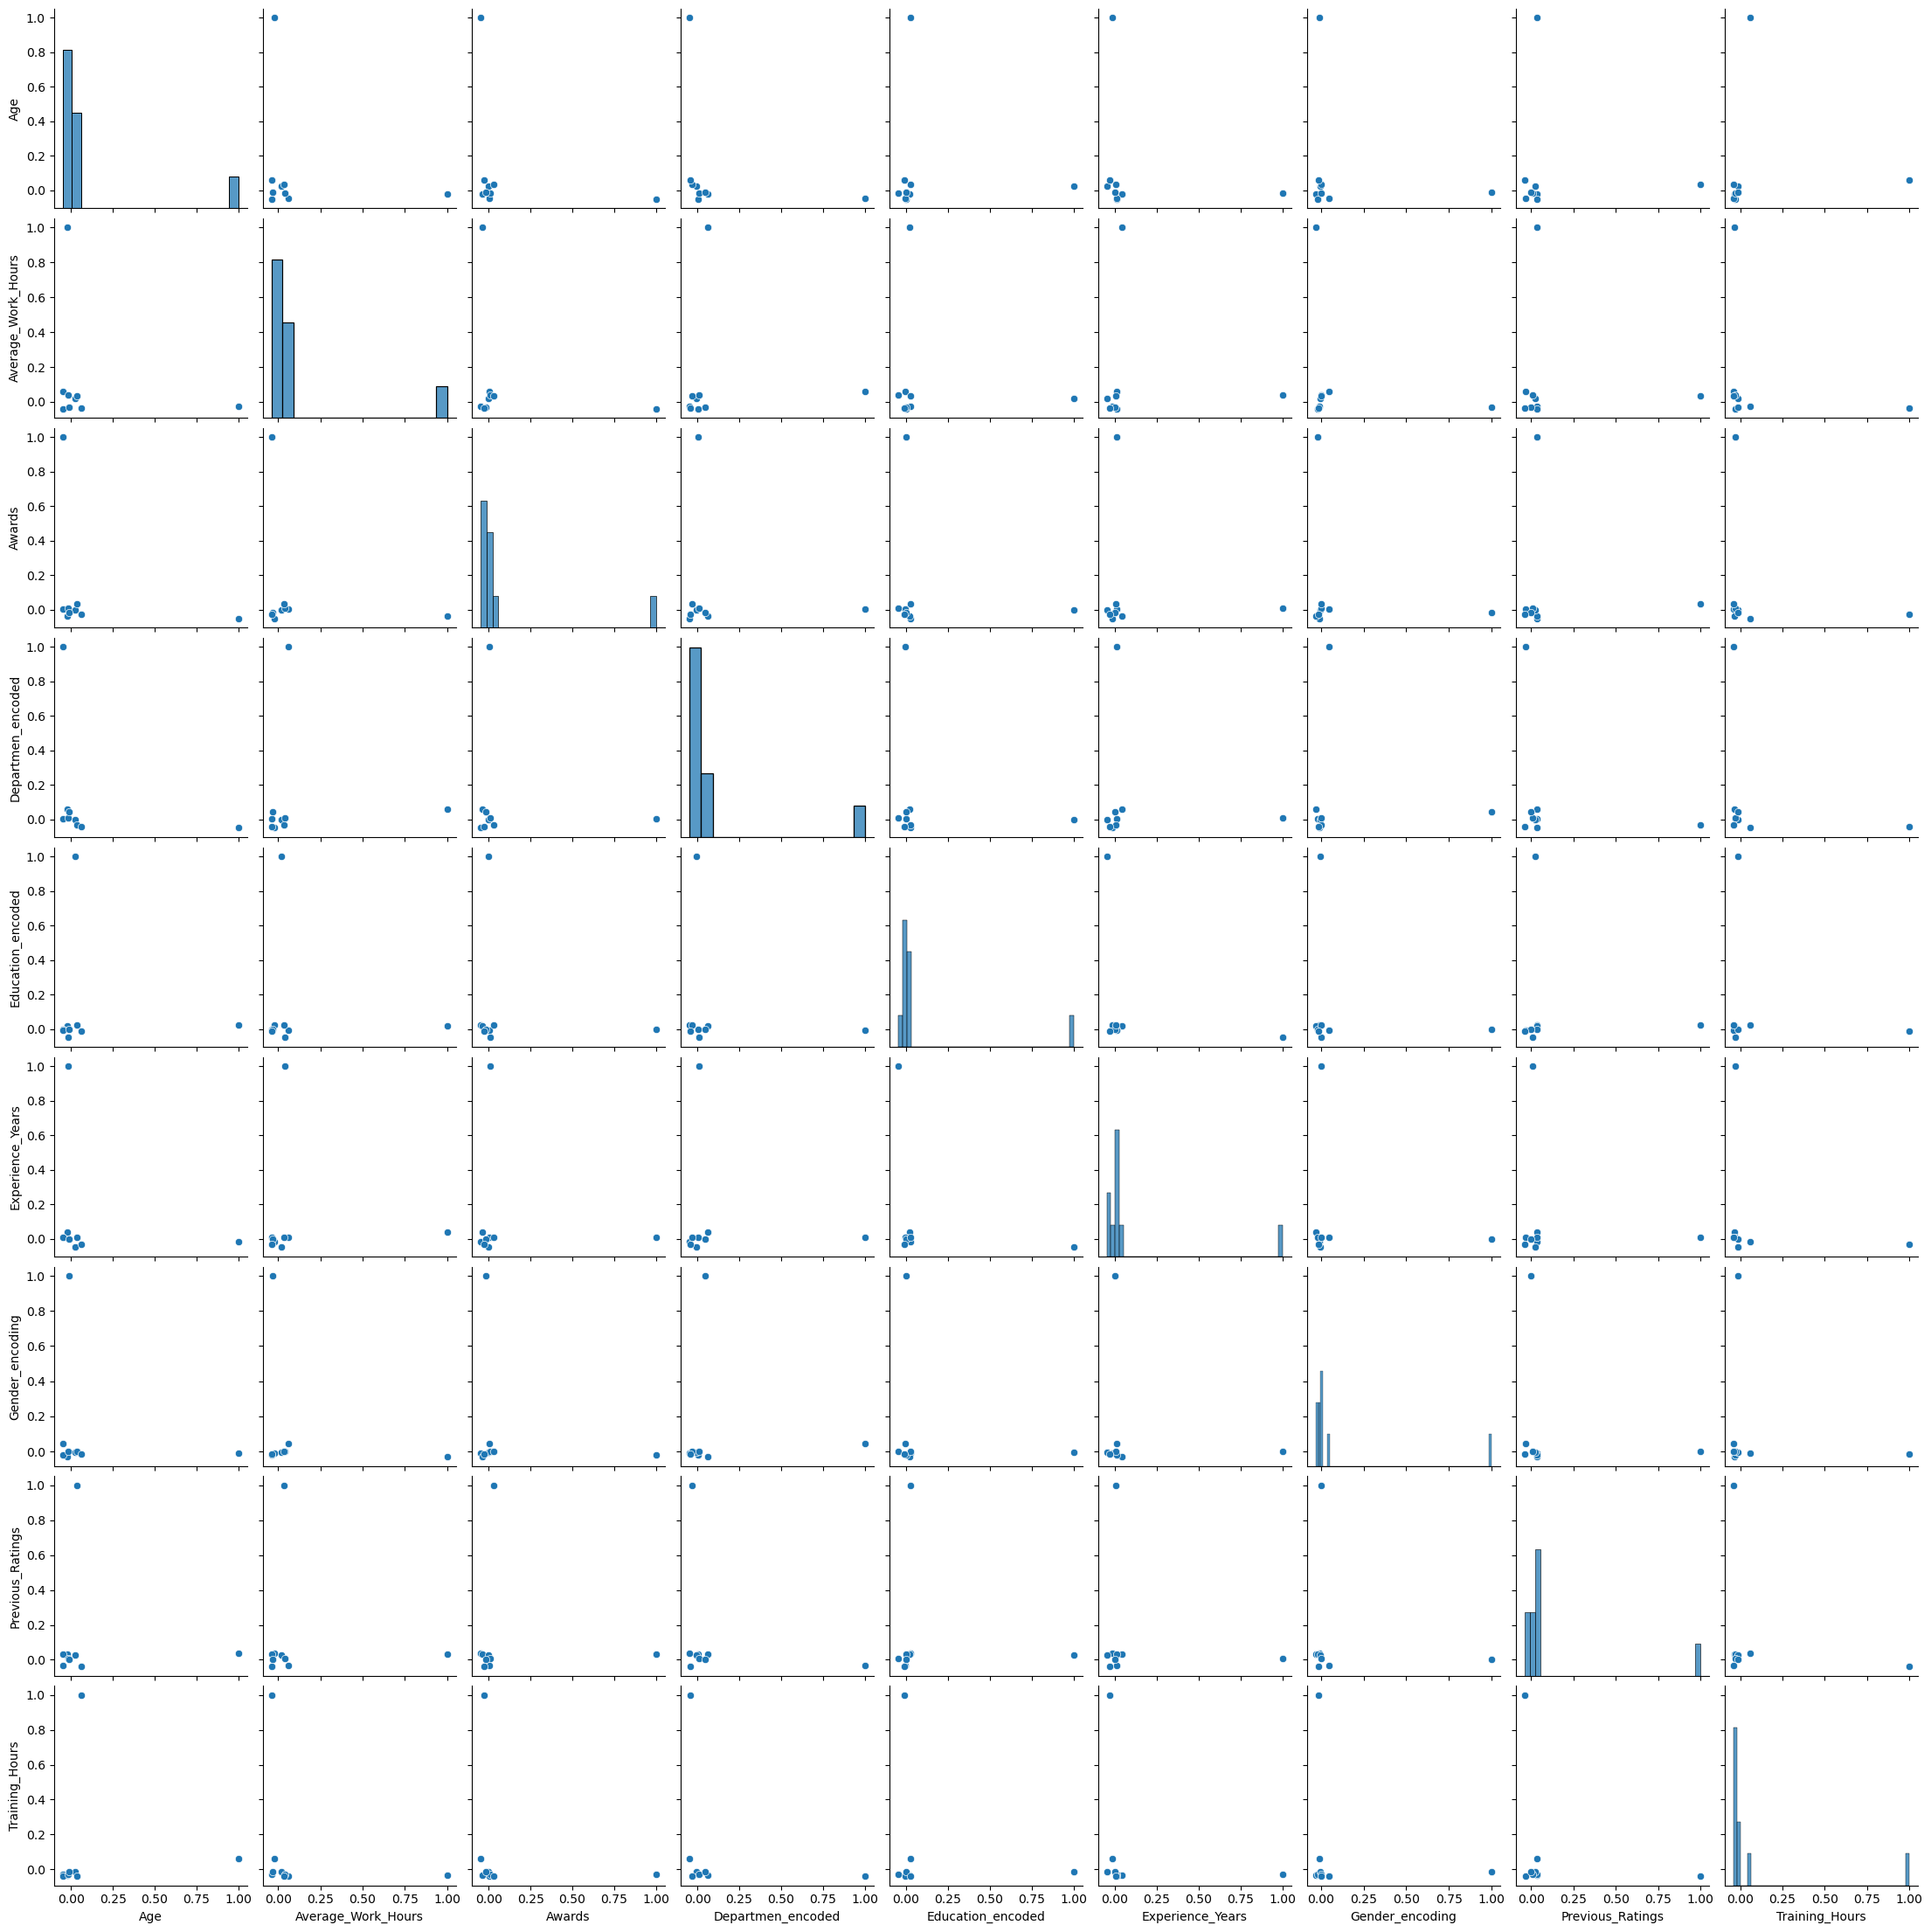

In [43]:
corr=data.iloc[:,0:9].corr()
sns.pairplot(corr)

<Axes: >

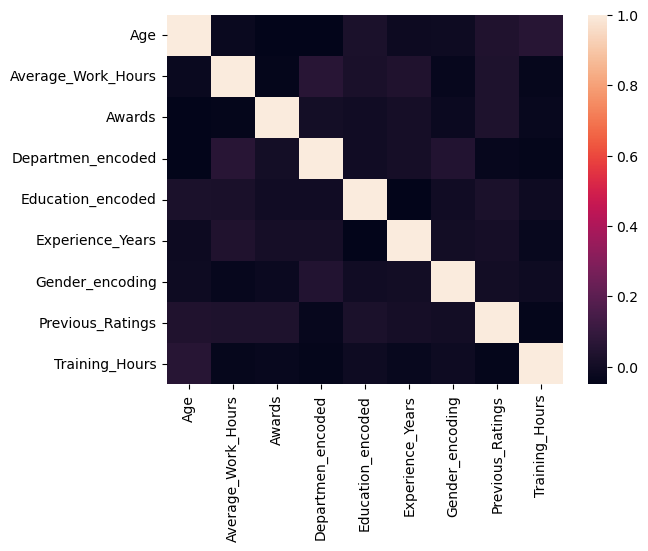

In [44]:
sns.heatmap(corr)

In [45]:
# Train-test split

X = data.drop(columns=['Promoted'])  # Replace 'target_column' with your target variable
Y = data['Promoted']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (800, 9)
Shape of X_test: (200, 9)
Shape of y_train: (800,)
Shape of y_test: (200,)
